# Gender Breakdown in Higher Academic for CS/Engineering in the US

- **Organization:** Ursatech Berkeley https://ursatechberkeley.com/
    - UrsaTech partners with student organizations to facilitate creative and impactful initiatives using computer science. We give back to our campus community by providing pro-bono consulting services within the UC Berkeley community and lending our expertise to university-affiliated groups
- **Position:** Data Consultant
- **Project Partner:** Bias Busters https://biasbusters.berkeley.edu/
- **Project Goal:** One of Bias Busters’ main objectives is to uncover and mitigate the roadblocks that prevent minority groups from pursuing successful academic and professional careers in CS/Engineering. In order to assist with this goal, UrsaTech will pursue a data analysis project that involves scraping the web to amalgamate and identify patterns within university demographic data. This will help us determine how students progress through CS/Engineering programs in undergrad, graduate programs, and/or faculty positions. My focus for this project was gender.

## Table of Contents
* [Question 1: Proportion of Women CS Faculty in the US](#q1)
    * [Data Collection: Web Scraping](#webscrap)
    * [Data Cleaning: CSV Files](#webscrap)
    * [Hypothesis Testing](#test)
* [Question 2: Representation of Women Doctorate Recipients of Computer & Info Science,Through time](#q2)
* [Question 3: Representation of Women Engineers in Higher Academia Through Time](#q2)
* [Findings](#findings)

In [1]:
from requests import get
from bs4 import BeautifulSoup
import re
import pandas as pd
import urllib.request
import numpy as np
from scipy import stats
from scipy.stats import ttest_1samp
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline  

<a class="anchor" id="q1"></a>
## Q1: Are there equal proportions of women and men in CS Faculty Positions in the US? 

### Data Collection: Web Scraping <a class="anchor" id="webscrap"></a>
- **Purpose**: Web scrap data on Name & Gender of CS faculty at MIT, Stanford, and UC Berkeley
- **MIT Website**: https://www.eecs.mit.edu/people/faculty-advisors
- **Stanford Website**: https://cs.stanford.edu/directory/faculty
- **Cal Website**: https://www2.eecs.berkeley.edu/Faculty/Lists/CS/faculty.html

#### Functions

In [164]:
def lst_data(website: str, tag: str, attrs_key: str, attrs_txt: str):
    response = get(website)
    html = BeautifulSoup(response.text, 'html.parser')
    name_data = html.find_all(tag, attrs={attrs_key: re.compile(attrs_txt)})
    return name_data

#names = [first name, last name]
def index_values(names, name_data):
    lst = []
    for name in names:
        name_str = [str(x) for x in name_data]
        new_list = [name_str.index(x) for x in name_str if re.search(name, x)]
        lst.append(new_list[0])
    return lst 

def make_df(name_lst, school, female_lst):
    df = pd.DataFrame({'Name': name_lst, 'School': school, 'Gender': 'male'})
    df.index = df['Name']
    df.loc[female_lst, 'Gender'] = 'female'
    df = df.reset_index(drop=True)
    return df

def plot(x, y_label, title):
    plt.figure(figsize=(13,4))
    for key in y_label:
        plt.plot(x, y_label[key], label=key)
    plt.legend(loc="upper left")
    plt.title(title)

#### MIT

In [3]:
name_data = lst_data('https://www.eecs.mit.edu/people/faculty-advisors','a',  'href', '^http')
name_data[:2]

[<a href="http://web.mit.edu" style="display:block;"></a>,
 <a href="https://eecs.scripts.mit.edu/eduportal/who_is_teaching_what/F/2020/" title="Who is Teaching What Spring 2020"><span>Whos Teaching What</span></a>]

In [4]:
index_values(['Hal Abelson', 'Victor Zue'], name_data)

[45, 215]

In [5]:
lst = []
for faculty in name_data[45:216]:
    lst.append(faculty.text)

In [6]:
female_lst = ['Regina Barzilay', 'Bonnie Berger', 'Sangeeta Bhatia', 'Tamara Broderick', 'Manya Ghobadi', \
          'Shafi Goldwasser', 'Polina Golland', 'Martha Gray', 'Stefanie Jegelka', 'Leslie Kaelbling', 'Yael Kalai', \
         'Dina Katabi', 'Leslie Kolodziejski', 'Barbara Liskov', 'Nancy Lynch', 'Muriel Médard', 'Stefanie Mueller', \
         'Farnaz Niroui', 'Asuman Ozdaglar', 'Negar Reiskarimian', 'Ronitt Rubinfeld', 'Jennifer L.M. Rupp', \
          'Daniela Rus', 'Vivienne Sze', 'Caroline Uhler', 'Virginia Williams', 'Mengjia Yan']

In [7]:
mit_df = make_df(lst, 'MIT', female_lst)
mit_df.head()

,Name,School,Gender
0,Hal Abelson,MIT,male
1,Elfar Adalsteinsson,MIT,male
2,Fadel Adib,MIT,male
3,Anant Agarwal,MIT,male
4,Pulkit Agrawal,MIT,male


#### Stanford

In [8]:
name_data = lst_data('https://cs.stanford.edu/directory/faculty', 'a', 'href', '^http')

In [9]:
index_values(['Maneesh Agrawala', 'Matei Zaharia'], name_data)

[8, 67]

In [10]:
lst = []
for faculty in name_data[8:68]: #remember [start:end] end is not inclusive!
    lst.append(faculty.text)

In [11]:
#Following professors website not linked so no 'a href' tag
lst.extend(['Jeannette Bohg', 'Mary Wootters', 'Stefano Ermon', 'Percy Liang', 'Chris Piech', 'Aviad Rubinstein', \
          'Keith Winstein'])

In [12]:
female_lst = ['Jeannette Bohg',  'Emma Brunskill', 'Chelsea Finn', 'Monica Lam', 'Karen Liu', 'Dorsa Sadigh', \
          'Caroline Trippel', 'Jennifer Widom', 'Mary Wootters']

In [13]:
stanford_df = make_df(lst, 'Stanford', female_lst)
stanford_df.head()

,Name,School,Gender
0,Maneesh Agrawala,Stanford,male
1,Alex Aiken,Stanford,male
2,Nima Anari,Stanford,male
3,Peter Bailis,Stanford,male
4,Clark Barrett,Stanford,male


#### Cal

In [14]:
name_data = lst_data('https://www2.eecs.berkeley.edu/Faculty/Lists/CS/faculty.html', 'a', 'href', '/Faculty')

In [15]:
index_values(['Pieter Abbeel', 'Bin Yu'], name_data)

[0, 222]

In [16]:
lst = []
for faculty in name_data[0:224]: #+2 from index because of '\n\n'
    lst.append(faculty.text)
lst[:5]

['\n\n', 'Pieter Abbeel', '\n\n', 'Krste AsanoviÄ\x87', '\n\n']

In [17]:
lst = lst[1::2]

In [18]:
lst[0], lst[-1]

('Pieter Abbeel', 'Bin Yu')

In [19]:
female_lst = ['Anca Dragan', 'Shafi Goldwasser', 'Marti Hearst', 'Bin Yu', 'Ruzena Bajcsy', 'Susan L. Graham', \
          'Nilah Ioannidis', 'Jennifer Listgarten', 'Raluca Ada Popa', 'Sylvia Ratnasamy', 'Niloufar Salehi', \
         'Sophia Shao', 'Dawn Song', 'Claire Tomlin', 'Laura Waller', 'Katherine A. Yelick']

In [20]:
berkeley_df = make_df(lst, 'Berkeley', female_lst)
berkeley_df.head()

,Name,School,Gender
0,Pieter Abbeel,Berkeley,male
1,Krste AsanoviÄ,Berkeley,male
2,Babak Ayazifar,Berkeley,male
3,Jonathan Bachrach,Berkeley,male
4,Ruzena Bajcsy,Berkeley,female


### Data Cleaning <a class="anchor" id="webscrap"></a>
- **Purpose**: Clean data pulled by teammates on Cornell, Carnegie Mellon Univesity, Princeton, Yale & add gender
- Self note: remember to check for duplicates, null values, etc
- **Data:** Web scraped by teammates from university website 

#### Cornell

In [21]:
cornell = pd.read_csv('data/cornellfaculty.csv')
cornell.head()

,Jayadev Acharya,"; Electrical and Computer Engineering, CS Field Member","Research Focus:\nInformation theory, machine learning, and algorithmic statistics"
0,Rachit Agarwal,"; Computer Science, CS Field Member","Research Focus:\nDistributed systems, systems ..."
1,David Albonesi,"; Electrical and Computer Engineering, CS Fiel...",Research Focus:\nAdaptive and reconfigurable m...
2,Lorenzo Alvisi,"; Computer Science, CS Field Member, Tisch Uni...",Research Focus:\nTheory and practice of depend...
3,Yoav Artzi,"; Computer Science, Cornell Tech, CS Field Member","Research Focus:\nNatural language processing, ..."
4,Shiri Azenkot,; Jacobs Technion-Cornell Institute; CS Field ...,Research Focus:\nHuman-computer Interactions ...


In [22]:
cornell.drop_duplicates(inplace=True)
cornell.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 109 entries, 0 to 108
Data columns (total 3 columns):
 #   Column                                                                            Non-Null Count  Dtype 
---  ------                                                                            --------------  ----- 
 0   Jayadev Acharya                                                                   109 non-null    object
 1   ; Electrical and Computer Engineering, CS Field Member                            109 non-null    object
 2   Research Focus:
Information theory, machine learning, and algorithmic statistics  109 non-null    object
dtypes: object(3)
memory usage: 3.4+ KB


In [23]:
cornell.rename(columns={cornell.columns[0]: 'Name'}, inplace=True)
cornell = cornell.append({'Name': 'Christina Delimitrou', cornell.columns[1]: '', cornell.columns[2]: ''}, ignore_index=True) 

cornell_female = ['Shiri Azenkot', 'Kavita Bala', 'Anne Bracy', 'Claire Cardie', 'Tanzeem Choudhury', \
                  'Nicola Dell', 'Deborah Estrin', 'K-Y. Fan', 'Carla Gomes', \
                  'Nika Haghtalab', 'Wendy Ju', 'Hadas Kress-Gazit', 'Kirstin Petersen', 'Kirstin Petersen',\
                  'Phoebe Sengers', 'Madeleine Udell', 'Amy Williams', 'Christina Lee Yu'
                 ]
cornell.tail(3)

,Name,"; Electrical and Computer Engineering, CS Field Member","Research Focus:\nInformation theory, machine learning, and algorithmic statistics"
107,Cheng Zhang,"; Information Science, CS Field Member","Research Focus:\nUbiquitous Computing, Wearabl..."
108,Zhiru Zhang,"; Electrical and Computer Engineering, CS Fiel...",Research Focus:\nComputer-aided design methodo...
109,Christina Delimitrou,,


In [24]:
cornell_df = make_df(cornell['Name'], 'Cornell', cornell_female)
cornell_df.head()

,Name,School,Gender
0,Rachit Agarwal,Cornell,male
1,David Albonesi,Cornell,male
2,Lorenzo Alvisi,Cornell,male
3,Yoav Artzi,Cornell,male
4,Shiri Azenkot,Cornell,female


#### Carnegie Mellon University (CMU)

In [25]:
cmu = pd.read_csv('data/cmufaculty.csv')
cmu.head()

,"Acar, Umut",Associate Professor,umut@cs.cmu.edu
0,"Ada, Anil",Associate Teaching Professor,aada@cs.cmu.edu
1,"Agarwal, Yuvraj",Associate Professor,yuvraj.agarwal@cs.cmu.edu
2,"Akoglu, Leman",Affiliated Faculty,lakoglu@andrew.cmu.edu
3,"Aldrich, Jonathan",Professor,aldrich@cs.cmu.edu
4,"Amvrosiadis, George",Faculty,gamvrosi@andrew.cmu.edu


In [26]:
cmu.drop_duplicates(inplace=True)
cmu.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 122 entries, 0 to 122
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Acar, Umut           122 non-null    object
 1   Associate Professor  122 non-null    object
 2   umut@cs.cmu.edu      121 non-null    object
dtypes: object(3)
memory usage: 3.8+ KB


In [27]:
cmu.rename(columns={cmu.columns[0]: 'Name'}, inplace=True)
cmu_female = ['Akoglu, Leman','Balcan, Nina','Balzer, Stephanie','Cervesato, Iliano','Cortina, Thomas', \
              'Fanti, Giulia','Hodgins, Jessica','Jia, Limin','Kaynar, Zeliha Dilsun','Pollard, Nancy', \
              'Reid-Miller, Margaret','Rivers, Kelly','Rosenthal, Stephanie','Scott, Dana', 'Shaw, Mary',\
              'Sherry, Justine','Veloso, Manuela M.','Wang, Weina','Wang, Weina','Wing, Jeannette','Zhang, Hui']

In [28]:
cmu_df = make_df(cmu['Name'], 'CMU', cmu_female)
cmu_df.head()

,Name,School,Gender
0,"Ada, Anil",CMU,male
1,"Agarwal, Yuvraj",CMU,male
2,"Akoglu, Leman",CMU,female
3,"Aldrich, Jonathan",CMU,male
4,"Amvrosiadis, George",CMU,male


#### Princeton

In [29]:
princeton = pd.read_csv('data/princetonfaculty.csv')
princeton.head()

,Ryan Adams,Professor,"Ph.D., University of Cambridge, 2009",rpa (@cs.princeton.edu),(609) 258-8682
0,Ibrahim Albluwi,Lecturer,"Ph.D., Institut National des Sciences Appliqué...",isma (@cs.princeton.edu),(609) 258-1144
1,Andrew Appel,Eugene Higgins Professor,"Ph.D., Carnegie-Mellon University, 1985",appel (@cs.princeton.edu),(609) 258-4627
2,Sanjeev Arora,Charles C. Fitzmorris Professor,"Ph.D., University of California, Berkeley, 1994",arora (@cs.princeton.edu),(609) 258-3869
3,David August,Professor,"Ph.D., University of Illinois, Urbana/Champaig...",august (@cs.princeton.edu),(609) 258-2085
4,Jack Brassil,Senior Research Scholar,"Ph.D., University of California, San Diego, 1991",jbrassil (@cs.princeton.edu),313 Sherrerd Hall


In [30]:
princeton.drop_duplicates(inplace=True)
princeton.info() #only concerned with non-null values for names. All rows have names so drop no na row

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60 entries, 0 to 59
Data columns (total 5 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   Ryan Adams                            60 non-null     object
 1   Professor                             60 non-null     object
 2   Ph.D., University of Cambridge, 2009  60 non-null     object
 3   rpa  (@cs.princeton.edu)              58 non-null     object
 4   (609) 258-8682                        56 non-null     object
dtypes: object(5)
memory usage: 2.8+ KB


In [31]:
princeton.rename(columns={princeton.columns[0]: 'Name'}, inplace=True)

princeton_female = ['Danqi Chen', 'Barbara Engelhardt', 'Christiane Fellbaum', 'Maia Ginsburg', \
                'Aarti Gupta', 'Gillat Kol', 'Xiaoyan Li', 'Margaret Martonosi', 'Soohyun Nam Liao', \
                'Jennifer Rexford', 'Olga Russakovsky', 'Mona Singh', 'Olga Troyanskaya']

In [32]:
princeton_df = make_df(princeton['Name'], 'Princeton', princeton_female)
princeton_df.head()

,Name,School,Gender
0,Ibrahim Albluwi,Princeton,male
1,Andrew Appel,Princeton,male
2,Sanjeev Arora,Princeton,male
3,David August,Princeton,male
4,Jack Brassil,Princeton,male


#### Yale

In [33]:
yale = pd.read_csv('data/yalefaculty.csv')
yale.head()

,Dana Angluin\n View user profile.,dana.angluin@yale.edu,"Dana Angluin\n View user profile.\n, B.A., Ph.D. University of California at Berkeley, 1969, 1976. Joined Yale Faculty 1979.\nProfessor of Computer Science\nAKW 414, 51 Prospect St, New Haven, CT 06511\ndana.angluin@yale.edu\nPhone: 203-432-1273"
0,James Aspnes\n View user profile.,james.aspnes@yale.edu,"James Aspnes\n View user profile.\n, PhD (CS) ..."
1,Abhishek Bhattacharjee\n View user profile.,abhishek@cs.yale.edu,"Abhishek Bhattacharjee\n View user profile.\n,..."
2,Yang Cai\n View user profile.,yang.cai@yale.edu,"Yang Cai\n View user profile.\n, Ph.D., Comput..."
3,Julie Dorsey\n View user profile.,julie.dorsey@yale.edu,"Julie Dorsey\n View user profile.\n, B.S., B. ..."
4,Stanley Eisenstat\n View user profile.,stanley.eisenstat@yale.edu,"Stanley Eisenstat\n View user profile.\n, M.S...."


In [34]:
yale.rename(columns={yale.columns[0]: 'Name'}, inplace=True)
yale['Name'] = yale['Name'].str.split('\n').str[0]
yale.head()

,Name,dana.angluin@yale.edu,"Dana Angluin\n View user profile.\n, B.A., Ph.D. University of California at Berkeley, 1969, 1976. Joined Yale Faculty 1979.\nProfessor of Computer Science\nAKW 414, 51 Prospect St, New Haven, CT 06511\ndana.angluin@yale.edu\nPhone: 203-432-1273"
0,James Aspnes,james.aspnes@yale.edu,"James Aspnes\n View user profile.\n, PhD (CS) ..."
1,Abhishek Bhattacharjee,abhishek@cs.yale.edu,"Abhishek Bhattacharjee\n View user profile.\n,..."
2,Yang Cai,yang.cai@yale.edu,"Yang Cai\n View user profile.\n, Ph.D., Comput..."
3,Julie Dorsey,julie.dorsey@yale.edu,"Julie Dorsey\n View user profile.\n, B.S., B. ..."
4,Stanley Eisenstat,stanley.eisenstat@yale.edu,"Stanley Eisenstat\n View user profile.\n, M.S...."


In [35]:
yale.drop_duplicates(inplace=True)
yale.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24 entries, 0 to 23
Data columns (total 3 columns):
 #   Column                                                                                                                                                                                                                                           Non-Null Count  Dtype 
---  ------                                                                                                                                                                                                                                           --------------  ----- 
 0   Name                                                                                                                                                                                                                                             24 non-null     object
 1   dana.angluin@yale.edu                                                                 

In [36]:
yale_female = ['Julie Dorsey', 'Joan Feigenbaum', 'Ruzica Piskac', 'Holly Rushmeier', 'Marynel Vázquez']

yale_df = make_df(yale['Name'], 'Yale', yale_female)
yale_df.head()

,Name,School,Gender
0,James Aspnes,Yale,male
1,Abhishek Bhattacharjee,Yale,male
2,Yang Cai,Yale,male
3,Julie Dorsey,Yale,female
4,Stanley Eisenstat,Yale,male


### Hypothesis Testing - 1 Sample T Test<a class="anchor" id="test"></a>
- **Null Hypothesis:** p = 0.5 (Equal proportion of women making up CS Faculty compared to men)
- **Hypothesis Test:** 1 sample T test
    - Why: Sample size <30 (only 7 schools) & unknown population standard deviation
    - "The t statistic is an estimate of the standard error of the mean of the population or how well known is the mean based on the sample size"
- **Sample:** CS Faculty at MIT, Stanford, UC Berkeley, Cornell, Carnegie Mellon, Princeton, and Yale

In [37]:
combine = [mit_df, stanford_df, berkeley_df, cornell_df, cmu_df, princeton_df, yale_df]
combine_df = pd.concat(combine)
combine_df['count'] = 1
combine_df.head()

,Name,School,Gender,count
0,Hal Abelson,MIT,male,1
1,Elfar Adalsteinsson,MIT,male,1
2,Fadel Adib,MIT,male,1
3,Anant Agarwal,MIT,male,1
4,Pulkit Agrawal,MIT,male,1


In [38]:
school_gender = combine_df.groupby(['Gender', 'School']).agg({'count': sum })
school_gender

count
Gender School          
female Berkeley      16
       CMU           20
       Cornell       17
       MIT           27
       Princeton     13
       Stanford       9
       Yale           5
male   Berkeley      96
       CMU          102
       Cornell       93
       MIT          144
       Princeton     47
       Stanford      58
       Yale          19

In [39]:
school_f = school_gender.loc['female', 'count']
school_f

School
Berkeley     16
CMU          20
Cornell      17
MIT          27
Princeton    13
Stanford      9
Yale          5
Name: count, dtype: int64

In [40]:
school = combine_df.groupby('School').agg({'count': sum })
school

,count
School,
Berkeley,112
CMU,122
Cornell,110
MIT,171
Princeton,60
Stanford,67
Yale,24


In [41]:
prop = school_gender / school
prop

count
Gender School             
female Berkeley   0.142857
       CMU        0.163934
       Cornell    0.154545
       MIT        0.157895
       Princeton  0.216667
       Stanford   0.134328
       Yale       0.208333
male   Berkeley   0.857143
       CMU        0.836066
       Cornell    0.845455
       MIT        0.842105
       Princeton  0.783333
       Stanford   0.865672
       Yale       0.791667

In [42]:
x = np.array(prop.loc['female', 'count'])
x

array([0.14285714, 0.16393443, 0.15454545, 0.15789474, 0.21666667,
       0.13432836, 0.20833333])

### Calculations From Scratch

In [43]:
n = len(x)
p = 0.5

In [44]:
#Method 1 to calculate sample std (from 165)
s1 = np.sqrt((((x - x.mean())**2).sum()) / (len(x)-1))

#Method 2 to calculate sample std 
var = x.var(ddof=1) #n-ddof -> bc for sample var divide by (n-1) not n
s2 = np.sqrt(var)

s1, s2

(0.031780231434056415, 0.031780231434056415)

In [45]:
#Calculate t-statistic
t = ((x.mean() - p) / s1) * np.sqrt(n)
t

-27.60904379142611

In [46]:
#Calculate p-value
df = len(x) - 1
p = (1 - stats.t.cdf(abs(t), df)) * 2 #make sure absolute value of t!
p 

1.492988044304866e-07

In [47]:
# calculate the critical value (how many std away from mean)
alpha = 0.05
cv = stats.t.ppf(1.0 - alpha, df)
cv

1.9431802803927816

### Calculations Using SciPy 

In [48]:
tset, pval = ttest_1samp(x, 0.5)
print('t-statistic:', tset)
print('pval:', pval)

if pval < 0.05:    # alpha value is 0.05 or 5%
   print("Reject")
else:
  print("Accept")

t-statistic: -27.609043791426107
pval: 1.4929880430512773e-07
Reject


<a class="anchor" id="q2"></a>
## Q2) How has the representation of women who received doctorates in Computer & Information Science (CIS) changed over time?
- **Purpose**: The number of women in CS faculty is much less than men in the US. Are there signficiantly less qualified women for CS professor positions? How does the proportion of women who receive their doctorates in CS compare to the proportion of men, changed over time?
- **data:**  https://ncses.nsf.gov/pubs/nsf20301/data-tables/#group3 -> "Doctorate recipients, by sex and major field of study: 2009–18"


In [49]:
sex_df = pd.read_csv('data/doc_sex.csv')
sex_df.head()

,Sex and major field of study,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,% change 2009–18
0,All doctorate recipientsa,"49,552","48,028","48,910","50,943","52,703","53,989","54,889","54,798","54,559","55,195",11.4
1,Life sciences,"11,403","11,319","11,535","11,964","12,207","12,484","12,493","12,536","12,555","12,780",12.1
2,Agricultural sciences and natural resources,"1,283","1,100","1,206","1,255","1,324","1,338","1,434","1,378","1,494","1,445",12.6
3,Biological and biomedical sciences,"8,025","8,046","8,152","8,322","8,354","8,868","8,783","8,861","8,566","8,801",9.7
4,Health sciences,"2,095","2,173","2,177","2,387","2,529","2,278","2,276","2,297","2,495","2,534",21.0


In [50]:
sex_df['Sex and major field of study'].unique()

array(['All doctorate recipientsa', 'Life sciences',
       'Agricultural sciences and natural resources',
       'Biological and biomedical sciences', 'Health sciences',
       'Physical sciences and earth sciences', 'Chemistry',
       'Geosciences, atmospheric sciences, and ocean sciences',
       'Physics and astronomy', 'Mathematics and computer sciences',
       'Computer and information sciences', 'Mathematics and statistics',
       'Psychology and social sciences', 'Psychology', 'Anthropology',
       'Economics', 'Political science and government', 'Sociology',
       'Other social sciences', 'Engineering',
       'Aerospace, aeronautical, and astronautical engineering',
       'Bioengineering and biomedical engineering',
       'Chemical engineering', 'Civil engineering',
       'Electrical, electronics, and communications engineering',
       'Industrial and manufacturing engineering',
       'Materials science engineering', 'Mechanical engineering',
       'Other engineeri

In [51]:
cs_df = sex_df[sex_df['Sex and major field of study']=='Computer and information sciences']
cs_df

,Sex and major field of study,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,% change 2009–18
10,Computer and information sciences,"1,610","1,633","1,667","1,793","1,843","1,988","2,003","2,082","1,998","2,004",24.5
55,Computer and information sciences,"1,260","1,286","1,312","1,419","1,502","1,580","1,581","1,662","1,548","1,568",24.4
100,Computer and information sciences,349,347,353,374,341,400,422,420,450,435,24.6


In [52]:
#0th row = all doctorate recipients, 1st row = male recipients, 2nd row = female recipients
cs_df = cs_df.iloc[1:, 1:-1].reset_index(drop=True)
cs_df.index = [['Male', 'Female']]
cs_df

,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Male,"1,260","1,286","1,312","1,419","1,502","1,580","1,581","1,662","1,548","1,568"
Female,349,347,353,374,341,400,422,420,450,435


In [53]:
cs_df = pd.DataFrame({'Date': list(cs_df.columns), 'male': list(cs_df.iloc[0, :]), 'female': list(cs_df.iloc[1, :])})
cs_df.head()

,Date,male,female
0,2009,"1,260",349
1,2010,"1,286",347
2,2011,"1,312",353
3,2012,"1,419",374
4,2013,"1,502",341


In [54]:
cs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    10 non-null     object
 1   male    10 non-null     object
 2   female  10 non-null     object
dtypes: object(3)
memory usage: 368.0+ bytes


In [55]:
#change Date from string to datetime
cs_df['Date'] = pd.to_datetime(cs_df['Date'])

In [56]:
#Change numbers from strings to floats
cs_df = cs_df.replace(',','', regex=True)
cs_df[['male', 'female']] = cs_df[['male', 'female']].apply(pd.to_numeric, errors='coerce')
cs_df.head()

,Date,male,female
0,2009-01-01,1260,349
1,2010-01-01,1286,347
2,2011-01-01,1312,353
3,2012-01-01,1419,374
4,2013-01-01,1502,341


In [57]:
cs_df['total'] = cs_df['male'] + cs_df['female']
cs_df['male%'] = cs_df['male'] / cs_df['total']
cs_df['female%'] = cs_df['female'] / cs_df['total']
cs_df.head()

,Date,male,female,total,male%,female%
0,2009-01-01,1260,349,1609,0.783095,0.216905
1,2010-01-01,1286,347,1633,0.787508,0.212492
2,2011-01-01,1312,353,1665,0.787988,0.212012
3,2012-01-01,1419,374,1793,0.791411,0.208589
4,2013-01-01,1502,341,1843,0.814976,0.185024


In [58]:
#prepare data to plot
num_df = cs_df.melt(id_vars=['Date'], value_vars=['male', 'female'], value_name='num of people', var_name='Gender')
num_df['Date'] = num_df['Date'].dt.year
num_df.head()

,Date,Gender,num of people
0,2009,male,1260
1,2010,male,1286
2,2011,male,1312
3,2012,male,1419
4,2013,male,1502


Text(0.5, 0.98, 'Number of Computer & Info Science Doctorate Recipients Based on Gender: 2009-18')

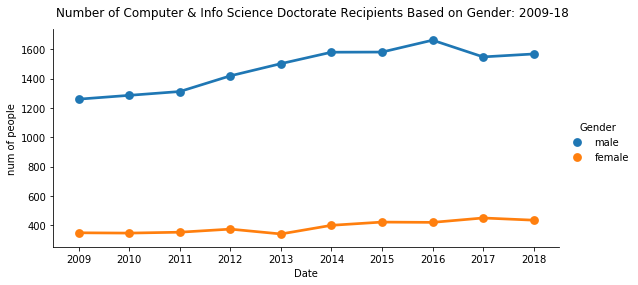

In [78]:
g = sns.factorplot(x="Date", y='num of people', hue='Gender', data=num_df, height=4, aspect=2)
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Number of Computer & Info Science Doctorate Recipients Based on Gender: 2009-18')

In [60]:
prop_df = cs_df.melt(id_vars=['Date'], value_vars=['male%', 'female%'], value_name='proportion', var_name='Gender')
prop_df['Date'] = prop_df['Date'].dt.year
prop_df.head()

,Date,Gender,proportion
0,2009,male%,0.783095
1,2010,male%,0.787508
2,2011,male%,0.787988
3,2012,male%,0.791411
4,2013,male%,0.814976


Text(0.5, 0.98, 'Proportion of Computer & Info Science Doctorate Recipients Based on Gender: 2009-18')

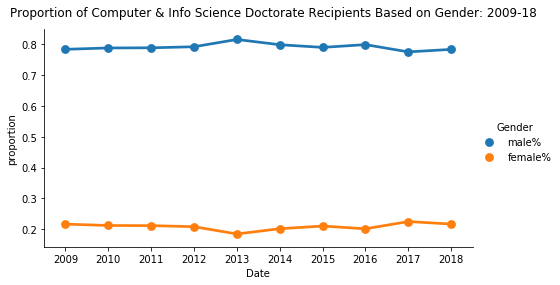

In [79]:
g = sns.factorplot(x="Date", y='proportion', hue='Gender', data=prop_df, height=4, aspect=1.7)
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Proportion of Computer & Info Science Doctorate Recipients Based on Gender: 2009-18')

<a class="anchor" id="q3"></a>
## Q3) How has the representation of women engineers in higher academic changed throughout time?
- **Purpose**: The number of women in CS faculty is much less than men in the US. Are there signficiantly less qualified women for CS professor positions? How does the proportion of women who receive their doctorates in CS compare to the proportion of men, changed over time?
- **data:** https://ncsesdata.nsf.gov/gradpostdoc/2018/html/gss18-dt-tab001-2c.html
- doctorate = nonfaculty holding


In [95]:
df = pd.read_csv('data/Sex_Grad_Postdoc_Doc_Engineering.csv')
df.head()

,Year,grad_total,grad_male_num,grad_male_percent,grad_female_num,grad_female_percent,postdoc_total,postdoc_male_num,postdoc_male_percent,postdoc_female_num,postdoc_female_percent,doctorate_total,doctorate_male_num,doctorate_male_percent,doctorate_female_num,doctorate_female_percent
0,1977,"68,757","65,051",94.6,"3,706",5.4,na,na,na,na,na,na,na,na,na,na
1,1978,"67,787",NaN,NaN,NaN,NaN,na,na,na,na,na,na,na,na,na,na
2,1979,"71,808","65,921",91.8,"5,887",8.2,"1,067","1,017",95.3,50,4.7,273,260,95.2,13,4.8
3,1980,"74,335","67,995",91.5,"6,340",8.5,981,916,93.4,65,6.6,423,398,94.1,25,5.9
4,1981,"79,585","71,838",90.3,"7,747",9.7,"1,040",958,92.1,82,7.9,503,471,93.6,32,6.4


In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Year                      45 non-null     object 
 1   grad_total                45 non-null     object 
 2   grad_male_num             44 non-null     object 
 3   grad_male_percent         44 non-null     float64
 4   grad_female_num           44 non-null     object 
 5   grad_female_percent       44 non-null     float64
 6   postdoc_total             45 non-null     object 
 7   postdoc_male_num          45 non-null     object 
 8   postdoc_male_percent      45 non-null     object 
 9   postdoc_female_num        45 non-null     object 
 10  postdoc_female_percent    45 non-null     object 
 11  doctorate_total           45 non-null     object 
 12  doctorate_male_num        45 non-null     object 
 13  doctorate_male_percent    45 non-null     object 
 14  doctorate_fe

In [97]:
df = df.drop_duplicates()

In [98]:
#Drop NA Values: na values are strings! can't use notna()
df = df[df['doctorate_female_percent'] != 'na']
df

,Year,grad_total,grad_male_num,grad_male_percent,grad_female_num,grad_female_percent,postdoc_total,postdoc_male_num,postdoc_male_percent,postdoc_female_num,postdoc_female_percent,doctorate_total,doctorate_male_num,doctorate_male_percent,doctorate_female_num,doctorate_female_percent
2,1979,"71,808","65,921",91.8,"5,887",8.2,"1,067","1,017",95.3,50,4.7,273,260,95.2,13,4.8
3,1980,"74,335","67,995",91.5,"6,340",8.5,981,916,93.4,65,6.6,423,398,94.1,25,5.9
4,1981,"79,585","71,838",90.3,"7,747",9.7,"1,040",958,92.1,82,7.9,503,471,93.6,32,6.4
5,1982,"83,720","74,943",89.5,"8,777",10.5,980,896,91.4,84,8.6,670,638,95.2,32,4.8
6,1983,"91,146","81,337",89.2,"9,809",10.8,"1,108","1,019",92,89,8,631,596,94.5,35,5.5
7,1984,"92,739","82,440",88.9,"10,299",11.1,"1,203","1,119",93,84,7,589,554,94.1,35,5.9
8,1985,"96,018","84,935",88.5,"11,083",11.5,"1,356","1,255",92.6,101,7.4,615,564,91.7,51,8.3
9,1986,"101,905","89,532",87.9,"12,373",12.1,"1,405","1,273",90.6,132,9.4,521,476,91.4,45,8.6
10,1987,"103,983","91,012",87.5,"12,971",12.5,"1,446","1,297",89.7,149,10.3,443,399,90.1,44,9.9
11,1988,"102,854","89,726",87.2,"13,128",12.8,"1,690","1,518",89.8,172,10.2,566,515,91,51,9


In [100]:
#clean year column
df = df[~df['Year'].str.contains('old')]
df.loc[:,'Year'] = df['Year'].str[:4]
df.tail()

,Year,grad_total,grad_male_num,grad_male_percent,grad_female_num,grad_female_percent,postdoc_total,postdoc_male_num,postdoc_male_percent,postdoc_female_num,postdoc_female_percent,doctorate_total,doctorate_male_num,doctorate_male_percent,doctorate_female_num,doctorate_female_percent
39,2014,"164,488","124,798",75.9,"39,690",24.1,"7,307","5,665",77.5,"1,642",22.5,"2,745","2,149",78.3,596,21.7
40,2015,"169,354","128,845",76.1,"40,509",23.9,"7,656","5,959",77.8,"1,697",22.2,"2,929","2,297",78.4,632,21.6
41,2016,"168,443","127,088",75.4,"41,355",24.6,"7,796","6,074",77.9,"1,722",22.1,"3,155","2,438",77.3,717,22.7
43,2017,"165,581","124,749",75.3,"40,832",24.7,"7,839","6,087",77.7,"1,752",22.3,"3,274","2,530",77.3,744,22.7
44,2018,"163,301","121,935",74.7,"41,366",25.3,"7,914","6,046",76.4,"1,868",23.6,"3,570","2,749",77,821,23


In [101]:
#Numbers are strings, change to floats
df = df.replace(',','', regex=True)
cols = df.columns[1:]
df[cols] = df[cols].apply(pd.to_numeric, errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40 entries, 2 to 44
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Year                      40 non-null     object 
 1   grad_total                40 non-null     int64  
 2   grad_male_num             40 non-null     int64  
 3   grad_male_percent         40 non-null     float64
 4   grad_female_num           40 non-null     int64  
 5   grad_female_percent       40 non-null     float64
 6   postdoc_total             40 non-null     int64  
 7   postdoc_male_num          40 non-null     int64  
 8   postdoc_male_percent      40 non-null     float64
 9   postdoc_female_num        40 non-null     int64  
 10  postdoc_female_percent    40 non-null     float64
 11  doctorate_total           40 non-null     int64  
 12  doctorate_male_num        40 non-null     int64  
 13  doctorate_male_percent    40 non-null     float64
 14  doctorate_fe

In [102]:
#change Year column from object to datetime
df['Year'] = pd.to_datetime(df['Year'])

### Proportion in Grad, PostDoc, and Doctorate-holding Nonfaculty Researchers

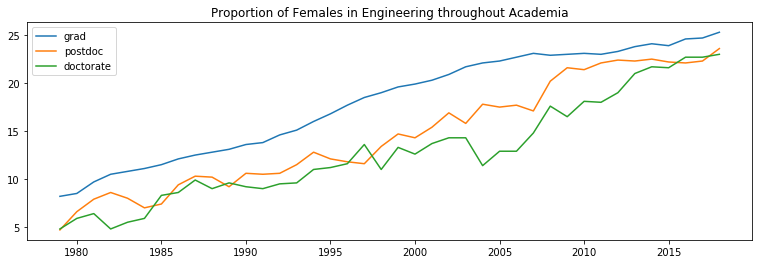

In [169]:
plot(df['Year'], {'grad':df['grad_female_percent'], 'postdoc':df['postdoc_female_percent'], \
                  'doctorate':df['doctorate_female_percent']}, 'Proportion of Females in Engineering throughout Academia')

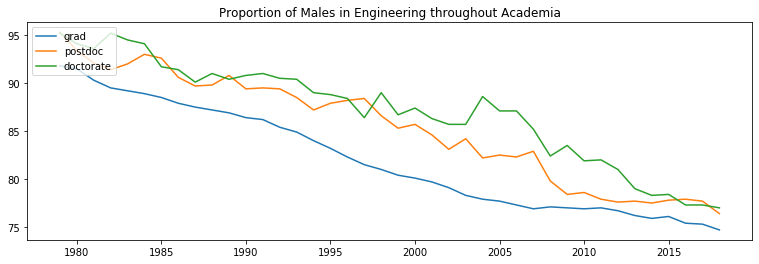

In [170]:
plot(df['Year'], {'grad':df['grad_male_percent'], 'postdoc':df['postdoc_male_percent'], \
                  'doctorate':df['doctorate_male_percent']}, 'Proportion of Males in Engineering throughout Academia')

### Numer Count in Grad, PostDoc, and Doctorate-holding Nonfaculty Researchers

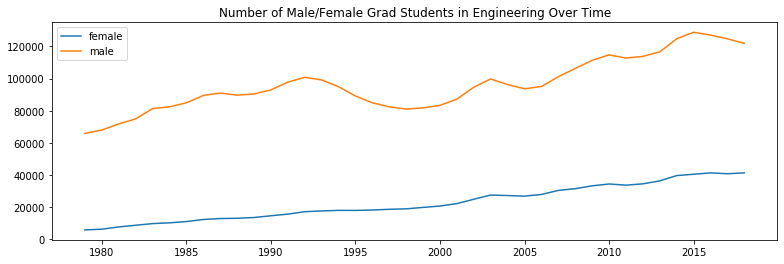

In [72]:
plot(df['Year'], df['grad_female_num'], df['grad_male_num'], 'female','male', \
     'Number of Male/Female Grad Students in Engineering Over Time')

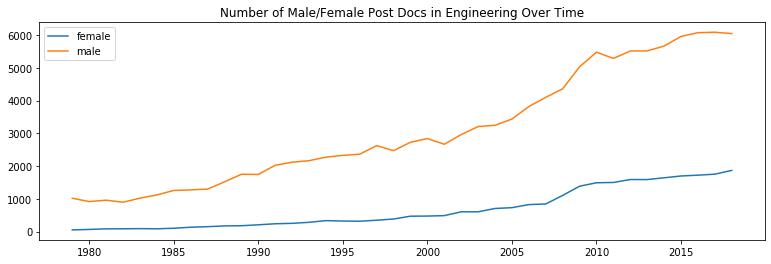

In [73]:
plot(df['Year'], df['postdoc_female_num'], df['postdoc_male_num'], 'female','male', \
     'Number of Male/Female Post Docs in Engineering Over Time')

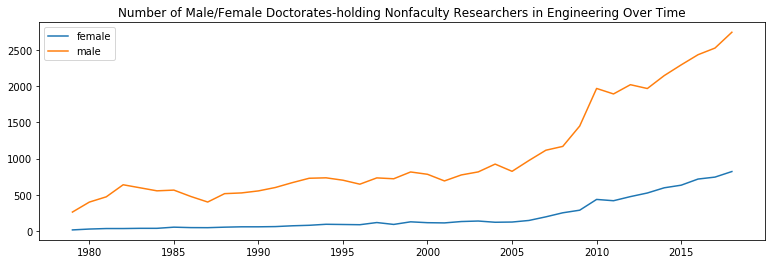

In [74]:
plot(df['Year'], df['doctorate_female_num'], df['doctorate_male_num'], 'female','male', \
     'Number of Male/Female Doctorates-holding Nonfaculty Researchers in Engineering Over Time')

<a class="anchor" id="findings"></a>
## Findings
*Note: Following only concerns US population*

- **Question 1 Finding:** I first questioned "Are there equal proportions of women and men in CS Faculty Positions in the US?" Using a 5% significance level, we reject the null hypothesis - the hypothesis test suggests that the proportion of women in CS faculty positions is not equally proportional compared to men in these positions. 
    - Why is that? How does the gender demographics for qualified candidates for CS faculty positions look like? 


- **Question 2 Finding:**  Question 1 findings led me to ask "How has the representation of women who received doctorates in Computer & Information Science (CIS) changed over time?" Notably, the proportion of Computer & Information Science (CIS) doctorate recipieints remain relatively the same from 2009-2018, with 80% men and 20% women. The data's trend suggests there has not been an increase in women representation in CIS doctorate degree recipients since 2009. 
    - This led me to further question women representation overall in Engineering as you progress higher in academia. *Note: There was no dataset specifically for computer science population demographics**


- **Question 3 Finding:** The proportion between female and male engineers in higher academia is shrinking since 1979. However, there remains a large difference between the number of women engineers and male engineers in higher academia. ***Interestingly, the higher up in academia, the smaller the proportion is of women to men engineering students.***